# Perkenalan

Nama Arry Pandowo, Batch 1 Full Stack Data Science Hacktiv8

# Library

In [15]:
import numpy as np
import scipy as sp
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

Penjelasan terkait penggunaan dari Library : 
* Numpy digunakan untuk melakukan manipulasi data array
* Pandas digunakan untuk melakukan manipulasi atas data dalam bentuk dataframe
* Scipy.stats digunakan untuk melakukan perhitungan statistik dengan library scipy
* Matplotlib dan seaborn digunakan untuk melakukan visualisasi data
* random digunakan untuk membantu penetapan seed agar random sampling yang dipilih tetap dan tidak berubah ketika file di re run
* statsmodels.stats.proportion digunakan untuk melakukan perhitungan z-test dan pvalue 

# Penanda Soal

Pada Tugas ini yang perlu dilakukan adalah:
* Data Loading atas dataset yang akan dianalisa
* Pengecekan dan perapihan atas data set untuk diolah lebih lanjut
* Penetapan sampling yang akan digunakan
* Penetapan atas hipotesis yang akan dilakukan testing
* perhitungan standard deviasi dan standard error
* perhitungan p-value untuk penetapan dari hipotesis

# Data Loading

## Load Data dengan pandas 

In [2]:
df = pd.read_csv("purchase_data.txt", sep=';')
df.head()

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


dikarenakan separator menggunakan semicolomn (;) maka ditambahkan attribute sept = ";"

## Pengecekan data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   purchased     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Data tidak memiliki informasi N/A, sehingga aman untuk diolah lebih lanjut

## Matriks Group data ke landing page

In [4]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


pada fungsi crosstab tersebut didapat informasi tentang hubungan antara list data group dan landing page, pada data tersebut diduga bahwa terdapat user yang melakukan view new page and old page pada sesi yang berbeda sehingga jumlah pada matriks menunjukan angka yang tidak sesuai dengan total populasi 

## mengetahui user dengan user id yang sama dengan login berulang

In [5]:
jmllogin = df['user_id'].value_counts(ascending=False)
banyaklogin = jmllogin[jmllogin > 1].count()
banyaklogin

3894

## menghilangkan user dengan user id yang sama dengan login berulang

Jumlah user dengan user_id yang sama dan login berulang sejumlah 3894 dikeluarkan dari sample size karena dapat menyebabkan double sampling ketika penetapan sample

In [6]:
userdrop = jmllogin[jmllogin > 1].index

updatedf = df[~df['user_id'].isin(userdrop)]
updatedf.shape

(286690, 5)

updatedf siap digunakan sebagai populasi yang akan digunakan dengan total populasi 286690

## Penetapan sample jumlah sample

Dengan banyaknya data populasi, maka perlu dilakukan pelaksanaan penetapan sample ditetapkan sebesar 3% dari total populasi yaitu sebesar

In [7]:
Population = 286690
Samplesize = 0.03
Sample = round(Population * Samplesize)
Sample

8601

sample yang ditetapkan sebesar 8601

# Data Processing

## Penetapan Hipotesis

Dari soal di tegaskan bahwa harus melakukan penetapan atas H0 dan H1 maka didapatkan formula penulisan hipotesis sebagai berikut : 

yang mana 
* H0 mengindikasikan bahwa desain baru memberikan dampak signifikan atas keputusan user melakukan pembelian, dan 
* H1 mengindikasikan bahwa desain baru tidak memberikan dampak yang signifikan atas keputusan user dalam melakukan pembelian 

> H0 : P = P0 atau
> H1 : P /= P0

Dikarenakan tes berikut termasuk kedalam social science, maka dapat digunakan **confidence level** di 95% dengan begitu dapat ditetapkan angka critical value pada 0.05%.
Metode penetapan hipotesis akan menggunakan **two-tailed test**, dimana  :

* Group dibagi kedalam 2 kelompok yakni Grup Kontrol dan grup treatment akan menjadi **Independent variable**
* Purchased memberikan informasi mengenai user melakukan pembelian (1) atau tidak (0) dalam sesi login yg dia lakukan akan menjadi **dependent variable**

## Penetapan sample

In [16]:
random.seed(10)
control_sample = updatedf[updatedf['group'] == 'control'].sample(n=8601)
treatment_sample = updatedf[updatedf['group'] == 'treatment'].sample(n=8601)

sampleAB = pd.concat([control_sample, treatment_sample])
sampleAB.reset_index(drop=True, inplace=True)

sampleAB.shape

(17202, 5)

Random seed ditetapkan 10 agar sample yang ditetapkan tidak bergerak

In [17]:
sampleAB.head()

,user_id,timestamp,group,landing_page,purchased
0,890548,2017-01-22 06:27:09.271738,control,old_page,0
1,818301,2017-01-16 03:35:08.250860,control,old_page,0
2,731812,2017-01-05 20:58:17.760317,control,old_page,0
3,921560,2017-01-11 19:47:05.763811,control,old_page,0
4,756081,2017-01-08 18:14:00.540807,control,old_page,0


berikut sample yang akan digunakan untuk melakukan penetapan hipotesis testing atas problem diatas, dengan total sample 17202 yang terdiri dari 8601 group control dan 8601 group treatment

## Data info atas sample AB

In [19]:
sampleAB.describe()

,user_id,purchased
count,17202.000000,17202.000000
mean,787865.070341,0.118707
std,91330.634161,0.323453
min,630000.000000,0.000000
25%,709052.500000,0.000000
50%,788063.000000,0.000000
75%,866866.250000,0.000000
max,945986.000000,1.000000


desrkipsi tersebut tidak memiliki arti bermakna untuk penelitian ini dikarenakan tujuan penelitian adalah untuk mengetahui dibelinya atau tidak sebuah produk (Yes or No), sehingga makna dari mean min quantile dan max tidak atas user id tidak memiliki makna berarti

## Berapa banyak yang beli ketika landing page baru ? 

In [18]:
beliDiBaru = sampleAB.groupby('group')['purchased']

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: stats.sem(x, ddof=0) 

beliDiBaru = beliDiBaru.agg([np.mean, std_p, se_p])
beliDiBaru.columns = ['beliDiBaru', 'std', 'std_error']

beliDiBaru

,beliDiBaru,std,std_error
group,,,
control,0.117893,0.322482,0.003477
treatment,0.119521,0.324401,0.003498


berdasarkan hasil berikut, didapat bahwa antara control dan treatment memiliki performance yang tidak jauh beda dengan standar deviasi 0,322 dengan visualisasi sebagai berikut : 

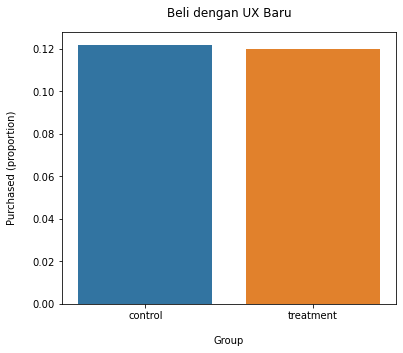

In [11]:
plt.figure(figsize=(6,5))

sns.barplot(x=sampleAB['group'], y=sampleAB['purchased'], ci=False)

plt.title('Beli dengan UX Baru', pad=15)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Purchased (proportion)', labelpad=15);

Semakin terlihat jelas dalam visualisasi bahwa performance keduanya tidak terlalu berbeda jauh

## P-Value dan z-test

untuk menghitung hasil P-Value dan Z-test dilakukan pengelompokan atas hasil sesuai dengan group

In [12]:
gControl = sampleAB[sampleAB['group'] == 'control']['purchased']
gTreatment = sampleAB[sampleAB['group'] == 'treatment']['purchased']

In [13]:
totControl = gControl.count()
totTreatment = gTreatment.count()
successes = [gControl.sum(),gTreatment.sum()]
nobs = [totControl, totTreatment]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

In [21]:
print('p-value = ' , pval)
print('z-stat = ' , z_stat)
print('95% for control group = ',lower_con, upper_con)
print('95% for treatment group = ',lower_treat, upper_treat) 

p-value =  0.7082751462424903
z-stat =  0.3741736237702787
95% for control group =  0.11493332087755263 0.12875927300687942
95% for treatment group =  0.11311878370106722 0.12685331256680862


# Hasil

Kesimpulan : 

> hasil p-value (0.708) berada diatas critical-value (0.05) maka H1 diterima, dan H0 ditolak yang artinya desain baru tidak memberikan dampak signifikan terhadap keputusan user dalam melakukan pembelian
